## Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Training.csv")

In [ ]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


## Label Encoding & One Hot Encoding

In [ ]:
# Label Encoding
le = LabelEncoder()
le.fit(data['prognosis'])
Y = le.transform(data['prognosis'])
data['prognosis_encoded']= le.fit_transform(data['prognosis'])
data['prognosis_encoded'].unique()


# One Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data["prognosis"].values.reshape(-1, 1))
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["prognosis"]))
one_hot_df = one_hot_df.astype(int)
unique_values = data["prognosis"].unique()
new_column_names = {old_name: value for old_name, value in zip(one_hot_df.columns, unique_values)}
one_hot_df.rename(columns=new_column_names, inplace=True)
data_encoded = pd.concat([data, one_hot_df], axis=1)
data_encoded = data_encoded.drop(["prognosis"], axis=1)
data_encoded = data_encoded.drop(["prognosis_encoded"], axis=1)

In [ ]:
y = one_hot_df
X = data_encoded.drop(y, axis=1)

In [ ]:
for column in X.columns:
    unique_values = X[column].unique()
    if any(value not in [0, 1] for value in unique_values):
        print(column)
    else:
        None

## Number of one's in each column of X

In [ ]:
columns_to_count = [col for col in data.columns if col not in ["prognosis", "prognosis_encoded"]]
ones_count = data[columns_to_count].sum()

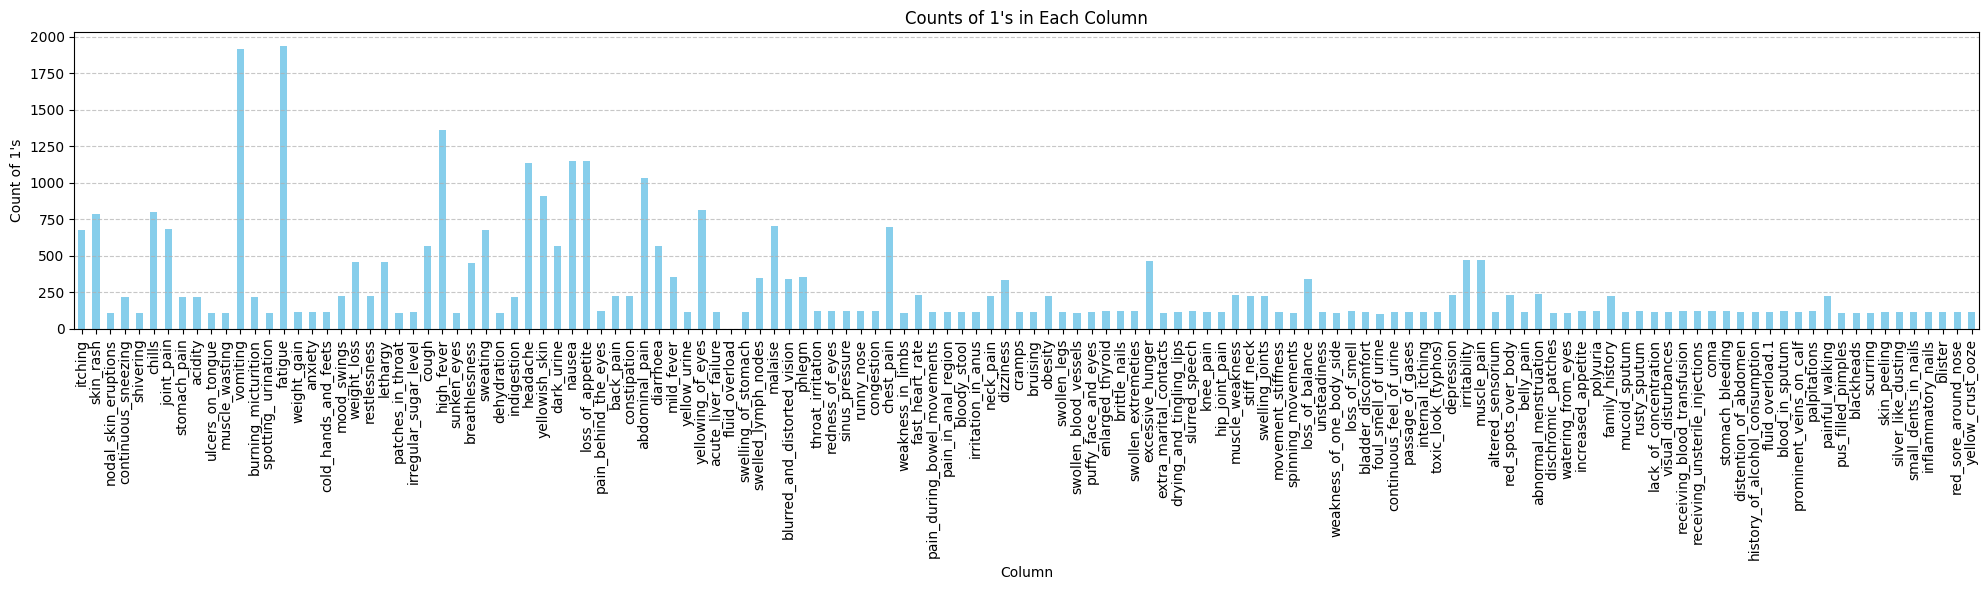

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
ones_count.plot(kind='bar', color='skyblue')
plt.title('Counts of 1\'s in Each Column')
plt.xlabel('Column')
plt.ylabel('Count of 1\'s')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
selected_columns = ones_count[ones_count > 120].index
new_df = data[selected_columns]

In [ ]:
new_df

,itching,skin_rash,continuous_sneezing,chills,joint_pain,stomach_pain,acidity,vomiting,burning_micturition,fatigue,...,stiff_neck,swelling_joints,loss_of_balance,depression,irritability,muscle_pain,red_spots_over_body,abnormal_menstruation,family_history,painful_walking
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_new = new_df
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score DT", f1)

F1_score DT 0.9800077029658556


## Correlation

In [ ]:
correlation_matrix = X_new.corr()

In [ ]:
correlation_matrix

,itching,skin_rash,continuous_sneezing,chills,joint_pain,stomach_pain,acidity,vomiting,burning_micturition,fatigue,...,stiff_neck,swelling_joints,loss_of_balance,depression,irritability,muscle_pain,red_spots_over_body,abnormal_menstruation,family_history,painful_walking
itching,1.000000,0.318158,-0.086906,-0.175905,-0.160650,0.202850,-0.086906,-0.057763,0.207896,0.069744,...,-0.088129,-0.088129,-0.109271,-0.089338,-0.130537,-0.130537,0.226497,-0.090534,-0.088129,-0.088129
skin_rash,0.318158,1.000000,-0.094786,-0.029324,0.171134,0.161784,-0.094786,-0.225046,0.166507,-0.105248,...,-0.096120,-0.096120,-0.119179,-0.097439,-0.142374,0.060683,0.481206,-0.098744,-0.096120,-0.096120
continuous_sneezing,-0.086906,-0.094786,1.000000,0.446238,-0.087351,-0.047254,-0.047254,-0.173459,-0.046581,0.041755,...,-0.047919,-0.047919,-0.059415,-0.048577,-0.070978,0.307345,-0.048577,-0.049227,-0.047919,-0.047919
chills,-0.175905,-0.029324,0.446238,1.000000,-0.004688,-0.095646,-0.095646,0.144263,-0.094285,0.269437,...,-0.096992,-0.096992,-0.120260,-0.098323,-0.143665,0.484212,0.181462,-0.099639,-0.096992,-0.096992
joint_pain,-0.160650,0.171134,-0.087351,-0.004688,1.000000,-0.087351,-0.087351,0.199921,-0.086108,0.066652,...,-0.088581,0.213231,-0.109831,-0.089796,-0.131206,0.310810,0.208312,-0.090998,-0.088581,0.213231
stomach_pain,0.202850,0.161784,-0.047254,-0.095646,-0.087351,1.000000,0.433917,0.031406,0.412239,-0.174797,...,-0.047919,-0.047919,-0.059415,-0.048577,-0.070978,-0.070978,-0.048577,-0.049227,-0.047919,-0.047919
acidity,-0.086906,-0.094786,-0.047254,-0.095646,-0.087351,0.433917,1.000000,0.019355,-0.046581,-0.174797,...,0.455129,-0.047919,-0.059415,0.448298,0.287433,-0.070978,-0.048577,-0.049227,-0.047919,-0.047919
vomiting,-0.057763,-0.225046,-0.173459,0.144263,0.199921,0.031406,0.019355,1.000000,-0.170990,0.008883,...,-0.175900,-0.175900,-0.041058,-0.178313,-0.099468,0.214206,0.033238,-0.180700,-0.175900,-0.175900
burning_micturition,0.207896,0.166507,-0.046581,-0.094285,-0.086108,0.412239,-0.046581,-0.170990,1.000000,-0.172308,...,-0.047237,-0.047237,-0.058569,-0.047885,-0.069968,-0.069968,-0.047885,-0.048526,-0.047237,-0.047237
fatigue,0.069744,-0.105248,0.041755,0.269437,0.066652,-0.174797,-0.174797,0.008883,-0.172308,1.000000,...,-0.177256,-0.177256,-0.219780,0.031508,0.211401,0.050595,0.254437,0.246845,0.238505,-0.177256


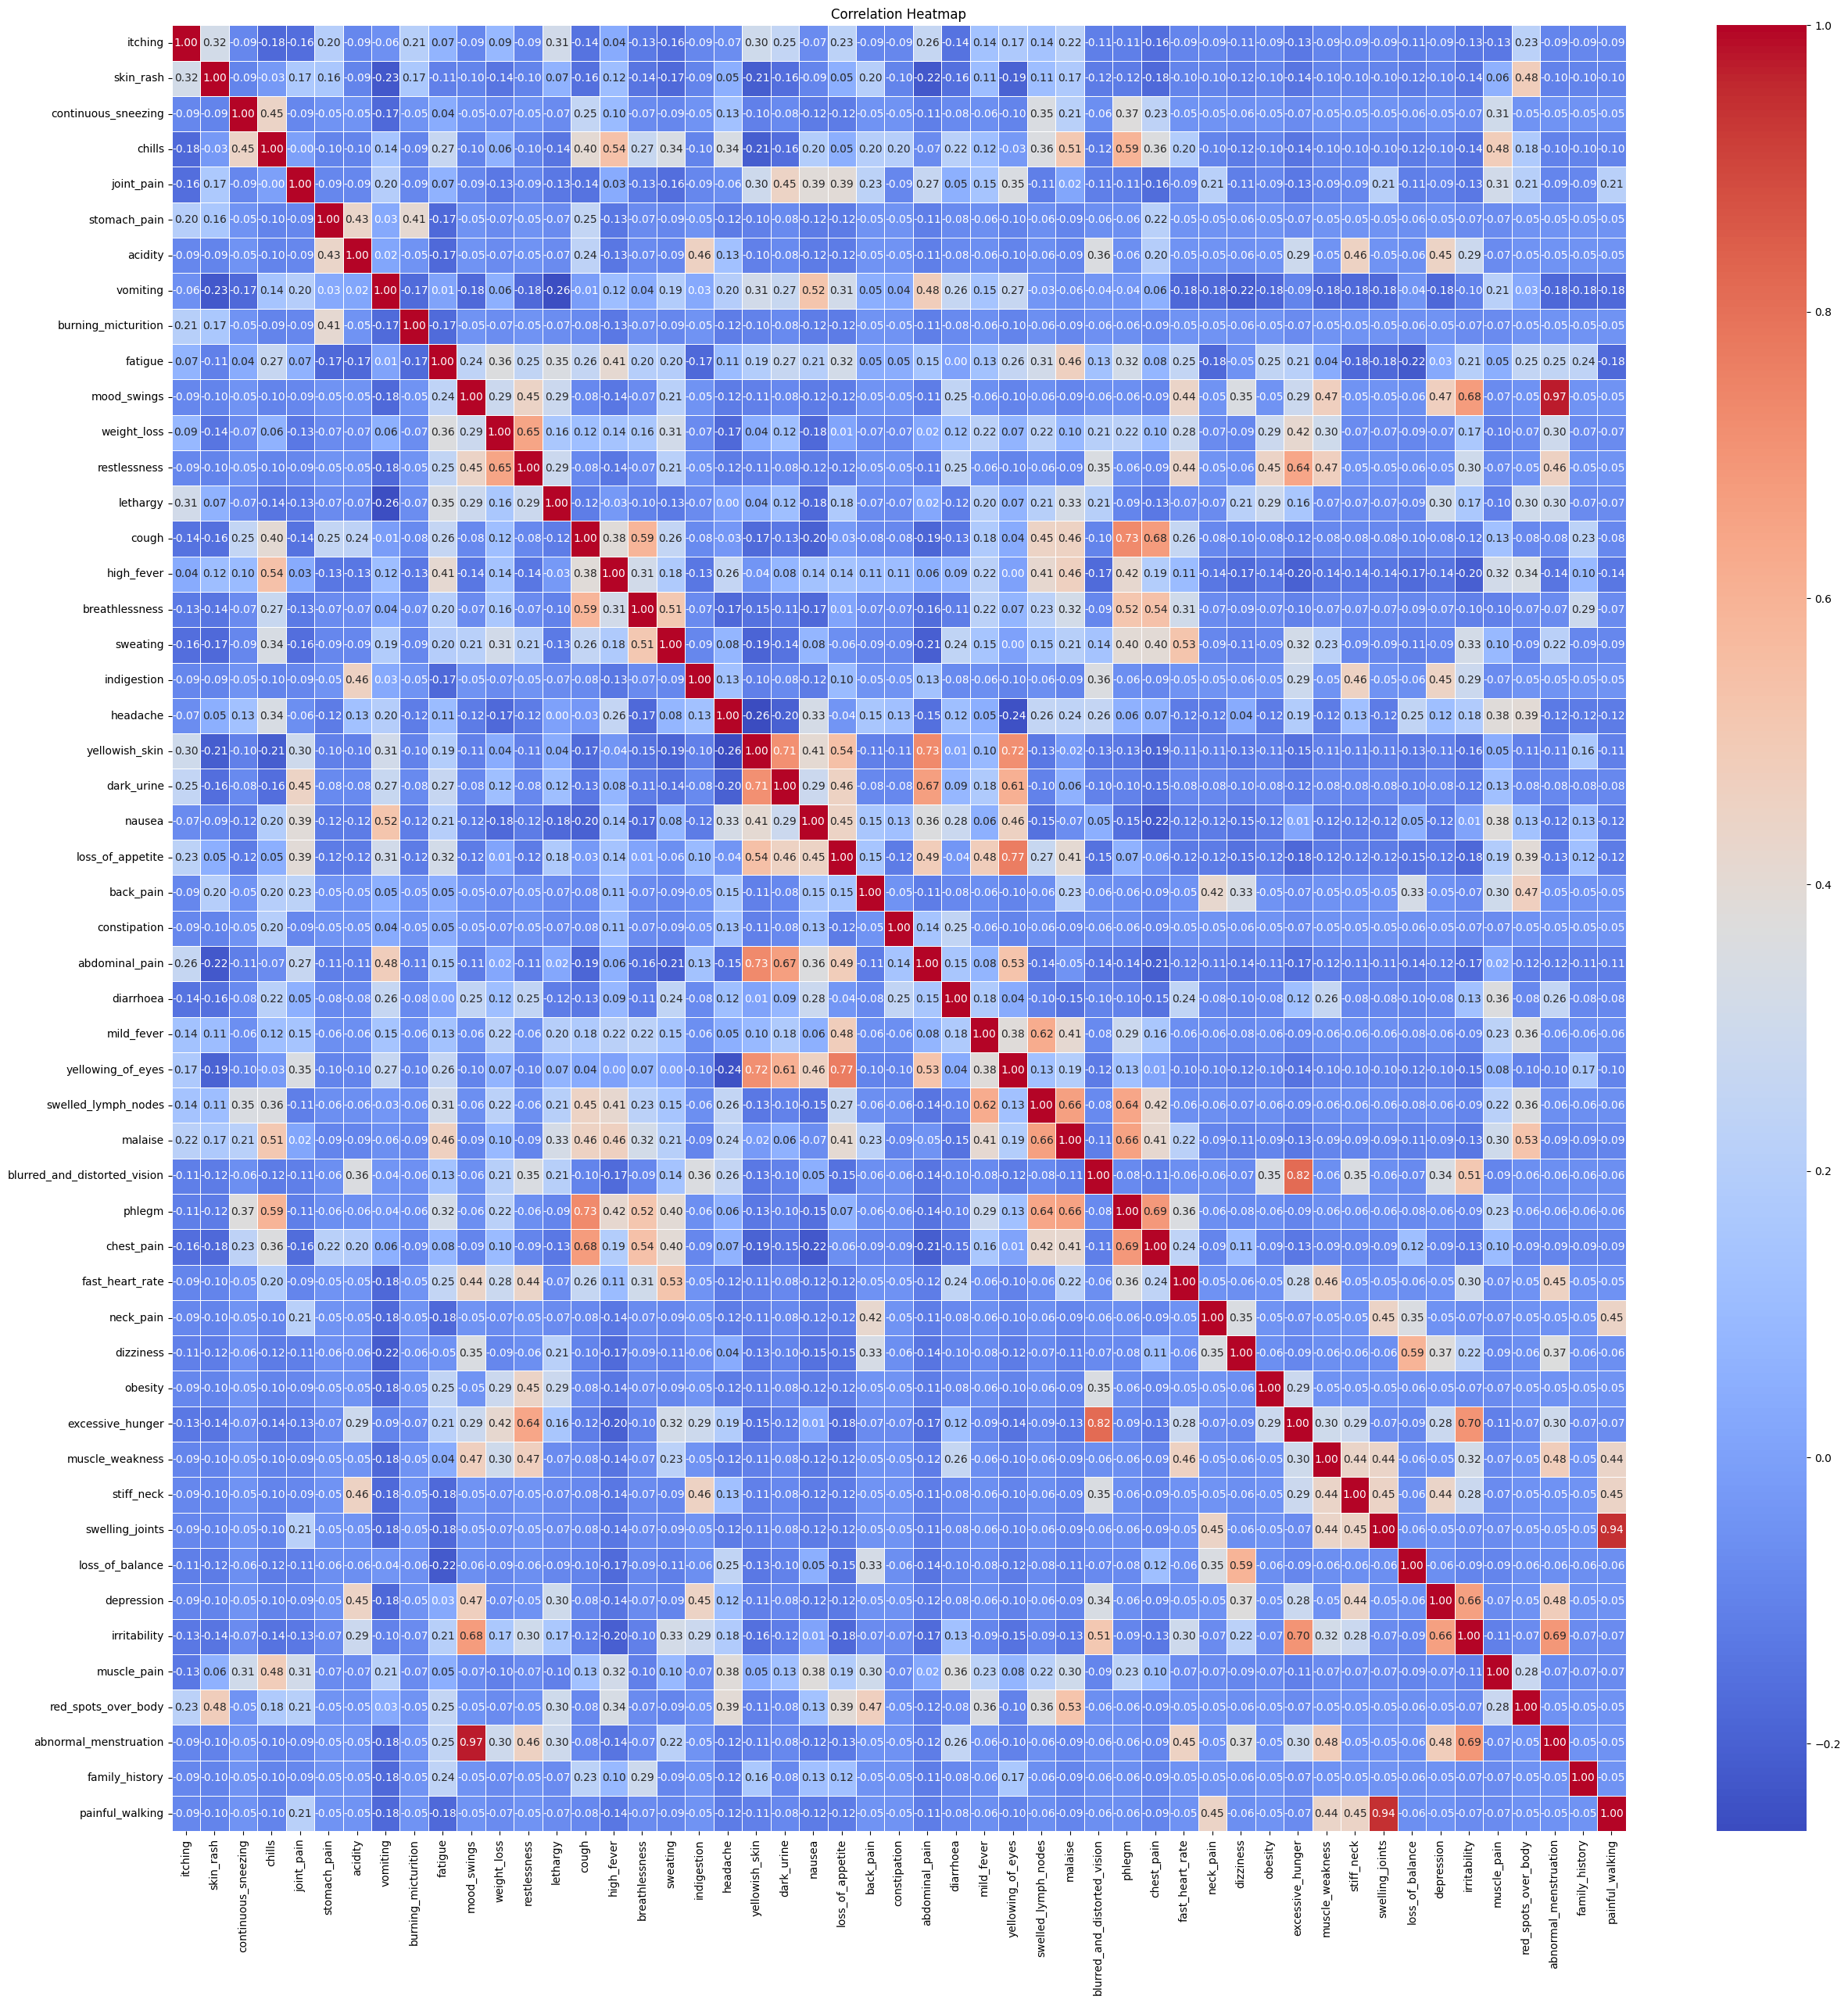

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
columns_to_drop = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.90:
            colname = correlation_matrix.columns[j]
            if colname not in columns_to_drop:
                columns_to_drop.append(colname)

X_filtered = X_new.drop(columns=columns_to_drop)

In [ ]:
X_filtered

,itching,skin_rash,continuous_sneezing,chills,joint_pain,stomach_pain,acidity,vomiting,burning_micturition,fatigue,...,excessive_hunger,muscle_weakness,stiff_neck,swelling_joints,loss_of_balance,depression,irritability,muscle_pain,red_spots_over_body,family_history
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_fil = X_filtered
y = data['prognosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_fil, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score", f1)

F1_score 0.9800077029658556


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_fil = X_filtered
y = data['prognosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_fil, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score", f1)

F1_score 0.9800077029658556


In [ ]:
correlation_matrix = X.corr()

In [ ]:
columns_to_drop = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.90:
            colname = correlation_matrix.columns[j]
            if colname not in columns_to_drop:
                columns_to_drop.append(colname)

X_filtered = X.drop(columns=columns_to_drop)

In [ ]:
X_filtered.shape

(4920, 90)

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_fil = X_filtered
y = data['prognosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_fil, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score", f1)

F1_score 1.0


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_fil = X_filtered
y = data['prognosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_fil, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score", f1)

F1_score 1.0


## RFE

##### Decision Tree

In [ ]:
model_used = DecisionTreeClassifier()
selector = RFE(model_used, n_features_to_select=13, step=1)
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)
print(X.shape, y.shape)

Selected features: Index(['high_fever', 'pain_behind_the_eyes', 'yellowing_of_eyes', 'phlegm',
       'slurred_speech', 'depression', 'muscle_pain', 'red_spots_over_body',
       'abnormal_menstruation', 'polyuria', 'rusty_sputum',
       'receiving_blood_transfusion', 'coma'],
      dtype='object')
(4920, 132) (4920,)


In [ ]:
X_selected = X[selected_features]
print(X_selected.shape)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score", f1)

(4920, 13)
F1_score 0.36860515390455545


In [ ]:
# With selected features

model_used = DecisionTreeClassifier()
selector = RFE(model_used, n_features_to_select=13, step=1)
selector = selector.fit(X_fil, y)
selected_features = X_fil.columns[selector.support_]
print("Selected features:", selected_features)
print(X_fil.shape, y.shape)

Selected features: Index(['chills', 'joint_pain', 'lethargy', 'high_fever', 'back_pain',
       'yellowing_of_eyes', 'malaise', 'phlegm', 'fast_heart_rate',
       'muscle_weakness', 'depression', 'irritability', 'muscle_pain'],
      dtype='object')
(4920, 49) (4920,)


In [ ]:
X_selected = X[selected_features]
print(X_selected.shape)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score", f1)

(4920, 13)
F1_score 0.4905525784104122


###### Random Forest

In [ ]:
model_used = RandomForestClassifier()
selector = RFE(model_used, n_features_to_select=13, step=1)
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)

print(X_fil.shape, y.shape)

Selected features: Index(['itching', 'skin_rash', 'joint_pain', 'vomiting', 'fatigue',
       'weight_loss', 'high_fever', 'headache', 'nausea', 'loss_of_appetite',
       'abdominal_pain', 'diarrhoea', 'irritability'],
      dtype='object')
(4920, 49) (4920,)


In [ ]:
X_selected = X[selected_features]
print(X_selected.shape)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score", f1)

(4920, 13)
F1_score 0.7364729984615743


In [ ]:
# with selected feature

model_used = RandomForestClassifier()
selector = RFE(model_used, n_features_to_select=13, step=1)
selector = selector.fit(X_fil, y)
selected_features = X_fil.columns[selector.support_]
print("Selected features:", selected_features)

print(X_fil.shape, y.shape)

Selected features: Index(['skin_rash', 'chills', 'joint_pain', 'vomiting', 'fatigue',
       'high_fever', 'sweating', 'headache', 'nausea', 'loss_of_appetite',
       'abdominal_pain', 'diarrhoea', 'irritability'],
      dtype='object')
(4920, 49) (4920,)


In [ ]:
X_selected = X[selected_features]
print(X_selected.shape)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score", f1)

(4920, 13)
F1_score 0.7730706927427491


##### SVM

In [ ]:
model_used = SVR(kernel="linear")
selector = RFE(model_used, n_features_to_select=13, step=1)
selector = selector.fit(X_fil, y)
selected_features = X_fil.columns[selector.support_]
print("Selected features:", selected_features)

print(X_fil.shape, y.shape)

Selected features: Index(['continuous_sneezing', 'stomach_pain', 'burning_micturition',
       'breathlessness', 'indigestion', 'headache', 'mild_fever',
       'swelled_lymph_nodes', 'chest_pain', 'neck_pain', 'stiff_neck',
       'loss_of_balance', 'red_spots_over_body'],
      dtype='object')
(4920, 49) (4920,)


In [ ]:
X_selected = X[selected_features]
print(X_selected.shape)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf =  SVR()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

(4920, 13)
Mean Squared Error: 64.88770798490444
Accuracy: 0.044715447154471545


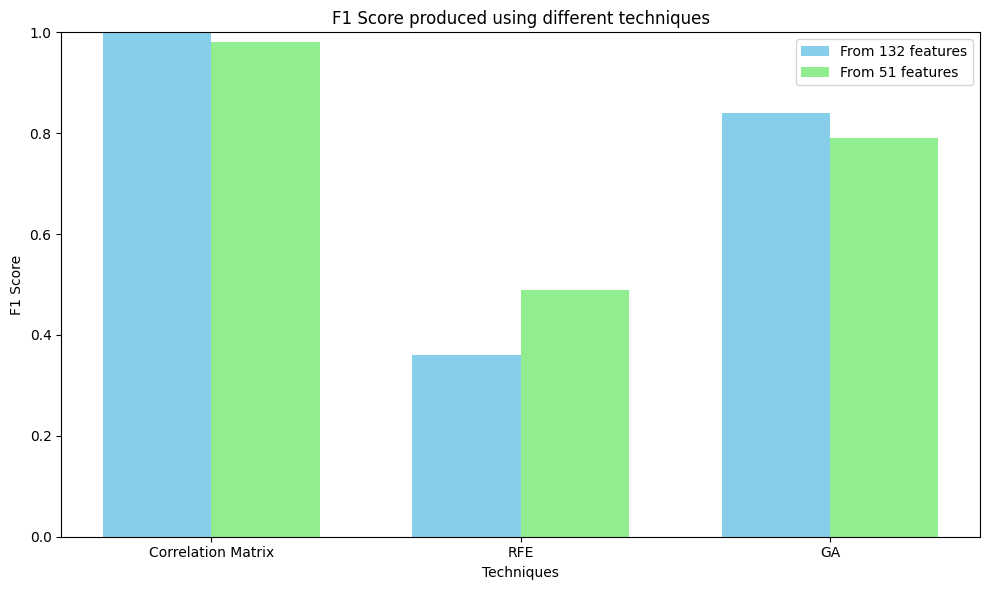

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
techniques = ['Correlation Matrix', 'RFE', 'GA']
f1_scores_132_features = [1.0, 0.36, 0.84]
f1_scores_51_features = [0.98, 0.49, 0.79]

# Number of techniques
num_techniques = len(techniques)

# Width of each bar
bar_width = 0.35

# X axis positions for the bars
index = np.arange(num_techniques)

# Plotting the bars
plt.figure(figsize=(10, 6))

# F1 scores from 132 features
plt.bar(index - bar_width/2, f1_scores_132_features, bar_width, label='From 132 features', color='skyblue')

# F1 scores from 51 features
plt.bar(index + bar_width/2, f1_scores_51_features, bar_width, label='From 51 features', color='lightgreen')

# Adding labels and title
plt.xlabel('Techniques')
plt.ylabel('F1 Score')
plt.title('F1 Score produced using different techniques')
plt.xticks(index, techniques)
plt.ylim(0, 1)  # Set y-axis limits
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
